In [10]:
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import argparse, progressbar
import matplotlib.pyplot as plt, mpld3
from matplotlib.figure import Figure
from matplotlib.axes import Axes
sns.set()
%matplotlib inline
mpld3.enable_notebook()

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [12]:
logreg = LogisticRegression(solver='liblinear', random_state=1)

In [13]:
df = pd.read_csv('http://bit.ly/MLtrain', nrows=10)

In [6]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
df.dropna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [58]:
df_x = df[['Embarked', 'Sex', 'Age', 'Fare']]
df_x

,Embarked,Sex,Age,Fare
1,C,female,38.0,71.2833
3,S,female,35.0,53.1000
6,S,male,54.0,51.8625


In [48]:
scaler = StandardScaler()

In [49]:

ohe = OneHotEncoder()
ct = make_column_transformer(
    (ohe, ['Embarked', 'Sex']),
    (scaler, ['Age', 'Fare'])
)

In [50]:
ct.fit_transform(df_x)

array([[ 1.        ,  0.        ,  1.        ,  0.        , -0.5195845 ,
         1.4119218 ],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.87929684,
        -0.63626425],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  1.39888134,
        -0.77565755]])

In [34]:
ct.get_feature_names_out()

array(['onehotencoder__Embarked_C', 'onehotencoder__Embarked_S',
       'onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'standardscaler__Age', 'standardscaler__Fare'], dtype=object)

In [35]:
df_y = df['Survived']
df_y

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [36]:
cat_feat_selector = SelectKBest(chi2,k=1)
num_feat_selector = SelectKBest(f_classif, k=1)

In [37]:
pipe = make_pipeline(ct, cat_feat_selector, num_feat_selector, logreg)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Embarked', 'Sex']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Fare'])])),
                ('selectkbest-1',
                 SelectKBest(k=1,
                             score_func=<function chi2 at 0x0000029862689488>)),
                ('selectkbest-2', SelectKBest(k=1)),
                ('logisticregression',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [38]:
pipe.named_steps.keys()

dict_keys(['columntransformer', 'selectkbest-1', 'selectkbest-2', 'logisticregression'])

In [39]:
pipe[0:2].fit_transform(df_x,df_y)

ValueError: Found input variables with inconsistent numbers of samples: [9, 10]

In [41]:
df_y.shape

(10,)

In [15]:
x = [1,2,3]

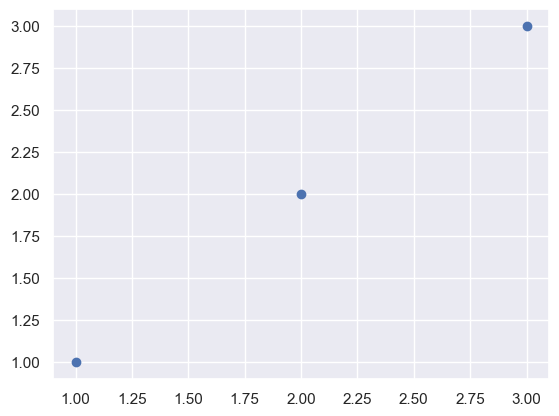

In [16]:
plt.scatter(x,x)
